In [113]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis


In [114]:
# define parameters
interval = "1mo"
start = "2022-01-01"
end = "2024-01-01"

# US Tech Stocks
us_stock_names = ["GOOGL", "AAPL", "AMZN", "NVDA", "BTC-USD"]
us_stocks = {name: yf.Ticker(name) for name in us_stock_names}

# # US Tech Index
NASDAQ = yf.Ticker("^IXIC")
SP500 = yf.Ticker("^GSPC")

# # Turkish Stock Index
BIST100 = yf.Ticker("XU100")

# # Turkish Stocks
tr_stock_names = ["AKBNK", "TUPRS"]
tr_stocks = {name: yf.Ticker(name) for name in tr_stock_names}

In [115]:
# UTILS

def print_stats(series: list, name: str, period: str):
    print(f"Stats for {name}:")
    print(f"Mean: {np.mean(series)}")
    print(f"Standard deviation: {np.std(series)}")
    print(f"Skewness: {skew(series)}")
    print(f"Kurtosis: {kurtosis(series)}")
    print("\n")

# 3)
    # Make a table where you have different frequencies and different descriptive statistics. Make the table to
    # show them all in a compact way. Please summarize your findings clearly but briefly by looking at the chapter
    # you are given. Please present US index (SP500) and US stocks in same plot.

def plot_stocks(stocks: dict, stock_name:str, country):
    stock = stocks[stock_name].history(interval=interval, start=start, end=end)[["Close"]]
    if country == "US":
        country_return = SP500.history(interval=interval, start=start, end=end)[["Close"]].pct_change()
    else:
        country_return = BIST100.history(interval=interval, start=start, end=end)[["Close"]].pct_change()
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_title('Montly Returns', fontsize=20)
    ax.set_xlabel('Year', fontsize=16)
    ax.set_ylabel('Price / Log Returns', fontsize=16)
    ax.tick_params(labelsize=12)
    ax.plot(stock.pct_change(), label=f'{stock_name} (period) Returns')
    ax.plot(country_return, label=f'{country} (period) Returns')
    ax.legend(fontsize=14)
    plt.show()

# 4)
    # Plot histograms of daily return plots of US Stocks against Bitcoin prices. Compare the expected return
    # (sample mean) and risk (standard deviation) of Bitcoin with that of other US stocks. Comment briefly how
    # does the expected return and risk (i.e. standard deviation) trade off work.

def plot_histograms(stocks: dict, stock_name:str):
    interval = "1d"
    start = "2024-03-01"
    end = "2024-01-01"
    stock_daily = stocks[stock_name].history(interval=interval, start=start, end=end)[["Close"]]
    print(stock_daily)
    stock_daily_returns = stock_daily.pct_change()
    btc_daily_returns = stocks["BTC-USD"].history(interval=interval, start=start, end=end)[["Close"]].pct_change()
    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_title('Daily Returns', fontsize=20)
    ax.set_xlabel('Day', fontsize=16)
    ax.set_ylabel('Price / Log Returns', fontsize=16)
    ax.tick_params(labelsize=12)
    ax.hist(stock_daily_returns, bins=50, alpha=0.5, label=f'{stock_name} (period) Returns')
    ax.hist(btc_daily_returns, bins=50, alpha=0.5, label='BTC (period) Returns')
    ax.legend(fontsize=14)
    plt.show()

In [116]:

for stock_name in us_stock_names:
    print(stock_name + ": ")
    data = us_stocks[stock_name].history(interval=interval, start=start, end=end)[["Close"]]         

    # 1 Arithmetic Return
    linear_returns = data.pct_change()
    # Print the result
    print("Linear Return Series:")
    print(linear_returns)
    
    # 2 Statistics
    closing_prices = data.to_numpy()
    print_stats(closing_prices, stock_name, "daily")
   
    # yearly_data = data.resample('Y').last()['Close']
    # monthly_data = data.resample('M').last()['Close']
    # weekly_data = data.resample('W').last()['Close']

    # 3 Table

    # 4 Histogram

GOOGL: 
Linear Return Series:
                              Close
Date                               
2022-01-01 00:00:00-05:00       NaN
2022-02-01 00:00:00-05:00 -0.001822
2022-03-01 00:00:00-05:00  0.029695
2022-04-01 00:00:00-04:00 -0.179467
2022-05-01 00:00:00-04:00 -0.003045
2022-06-01 00:00:00-04:00 -0.042185
2022-07-01 00:00:00-04:00  0.067518
2022-08-01 00:00:00-04:00 -0.069636
2022-09-01 00:00:00-04:00 -0.116152
2022-10-01 00:00:00-04:00 -0.011918
2022-11-01 00:00:00-04:00  0.068564
2022-12-01 00:00:00-05:00 -0.126349
2023-01-01 00:00:00-05:00  0.120254
2023-02-01 00:00:00-05:00 -0.088830
2023-03-01 00:00:00-05:00  0.151788
2023-04-01 00:00:00-04:00  0.034802
2023-05-01 00:00:00-04:00  0.144681
2023-06-01 00:00:00-04:00 -0.025800
2023-07-01 00:00:00-04:00  0.108772
2023-08-01 00:00:00-04:00  0.025995
2023-09-01 00:00:00-04:00 -0.038995
2023-10-01 00:00:00-04:00 -0.051811
2023-11-01 00:00:00-04:00  0.068101
2023-12-01 00:00:00-05:00  0.054026
Stats for GOOGL:
Mean: 115.9118382

$AAPL: possibly delisted; no price data found  (1d 2024-03-01 -> 2024-01-01) (Yahoo error = "Invalid input - start date cannot be after end date. startDate = 1709269200, endDate = 1704085200")


Empty DataFrame
Columns: [Close]
Index: []


$BTC-USD: possibly delisted; no price data found  (1d 2024-03-01 -> 2024-01-01) (Yahoo error = "Invalid input - start date cannot be after end date. startDate = 1709251200, endDate = 1704067200")


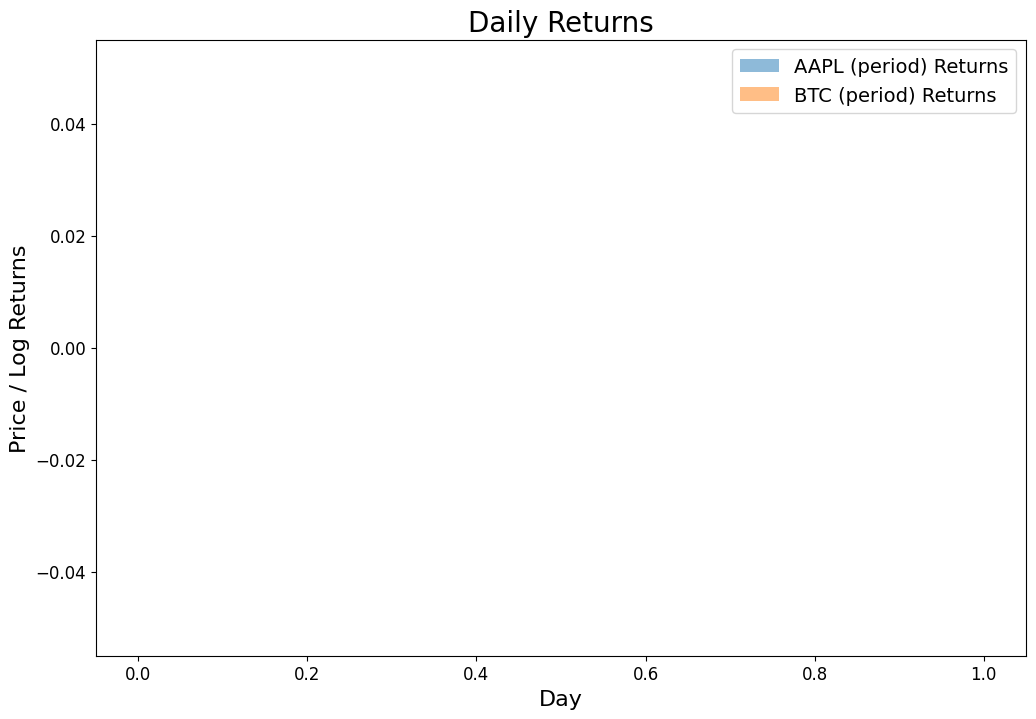

In [117]:


# plot_stocks(us_stocks, "AAPL", "US")

plot_histograms(us_stocks, "AAPL")


1. Calculate the mean and the st. Deviation of BTC and Apple stocks for monthly returns. How do
you comment on them? What is the correlation between these two stocks?

In [142]:
BTC = us_stocks["BTC-USD"].history(interval=interval, start=start, end=end)[["Close"]].pct_change().to_numpy()[1:].flatten()
APPLE = us_stocks["AAPL"].history(interval=interval, start=start, end=end)[["Close"]].pct_change().to_numpy()[1:].flatten()


correlation = np.corrcoef(BTC, APPLE)
print(correlation)

[ 1.22394150e-01  5.43011293e-02 -1.71805628e-01 -1.57035240e-01
 -3.77688308e-01  1.79541017e-01 -1.40855611e-01 -3.08220396e-02
  5.47548335e-02 -1.62336251e-01 -3.61748499e-02  3.98355562e-01
  3.48771067e-04  2.30312759e-01  2.77515564e-02 -7.00113422e-02
  1.19677981e-01 -4.09203765e-02 -1.12850705e-01  3.99685499e-02
  2.85519475e-01  8.78327004e-02  1.20713602e-01]
[[1.         0.61401872]
 [0.61401872 1.        ]]


2. Find the correlation between BTC returns and other US stock return series. Comment on your
findings on looking at my other notes (Risk Return Calculations). (find the correlation using
Python libraries)

3. Sharpe Ratio = µ/σ is a very popular performance ratio indicating how much return is
expected for a given risk. The higher the Sharpe ratio the better the risk adjusted
expected return. Calculate the daily, weekly, monthly sharpe ratio for US stocks. What
do we find? How would you manage your portfolio after your findings. What is the
Sharpe ratio of Bitcoin? (Note that we simplified Sharpe Ratio by assuming interest rates
are zero. sharpe = (µ -r)/σ where r is the interest rates.)

4. Markowitz Frontier: Please first read the risk-return calculations before attempting to
solve this question. Suppose your wealth is 100$. First you invest all your wealth in BTC
i.e w1=100%. Then you do divide your portfolio 50% BTC, 50% Apple. Then 1/3 BTC, 1/3
Google, 1/3 Apple. Finally you divide your wealth equally for all the stocks you have i.e
w1=w2=w3=w4 25% for each four stocks including Amazon.
    a. Calculate your expected return and st. Deviation of your portfolio for each of
    these 4 cases.
    b. Plot the expected return of portfolio 1,2,3,4 against number of stocks. Plot the
    standard deviation of each portfolio against the number of stocks in your
    portfolio
    c. What do you observe in terms of your standard deviation of your portfolio
    d. What do you expect your results if you add more stocks into your portfolio
    e. Can you generalize the saying “don’t put all of your eggs into a basket” with this
    exercise.

5. Stock Beta
Please focus on your monthly Turkish and US stocks and their stock indices XU100 and NASDAQ.
Choose one stock say Apple. Estimate the regression equation below.
    R_(i,t) α + β*R_(m,t)
R_i = i th stock arithmetic return for stock i say: APPLE for month t.
R_(m,t) = is the return of a stock index (i.e NASDAQ’s monthly stock returns), m is the
market index

6. Estimate the beta’s for each stocks. (Turkish and US stocks separately use BIST100
for the for Turkish Stocks. 2 betas for Turkey (AKB, Tupras) and 4 for US (APPLE,
GOOGLE,NVDIA, AMAZON.))

7. How do you compare the beta’s in US and Turkey separately? Which stock seemed to
have highest beta? Which stocks would you buy if you expect a sharp drop in growth in
US economy.

8. Do a statistical t test whether beta is significant or not? How does the model fit look at
their R-square?